Relativistic Corrections to Experimental Data - Visualizer

To obtain a complete picture of high-tc superconductors such as those based on Bi or heavy fermion systems, it is necessary to account for relativistic effects. BCS theory can be modified to describe single-particle effects. In this case, some unexpected relativistic phenomena emerge, like superconductor-specific spin-orbit coupling. The task of describing relativistic effects is more efficiently done within the BdG extension. Since Cooper pairs consist of two fermions, the description begins with a Dirac equation and involves a set of relativistic order parameters. This includes 16 components that can be grouped into 5 sets (which are the relevant order parameters): scalar (1 component), four-vector (4 components), pseudoscalar (1 component), axial vector (4 components) and antisymmetric tensor (6 components). For our purposes, it is enough to note that the Dirac BdG equation obtained is a relativistic generalization of the BdG equation and can be expanded to second order in 1/c to get to the weakly relativistic limit. Additional corrective terms arise at this point, specifically spin–orbit (involves the gradient of the lattice potential), Darwin (containing second derivatives of the lattice potential) and mass–velocity corrections. Correction terms that appear only in the superconducting state are called the anomalous spin-orbit coupling (ASOC) and anomalous Darwin terms. 

What happens if we try to crudely model our experimental result with BCS theory and then account for the aforementioned relativistic corrections? 

It turns out that the calculations for Bi-2223 have not been done yet in this regard, but we do know that there should be an upwards shift in the determination for the critical temperature. A ballpark of 0.3-1 K is a reasonable assumption based on the claim in the literature that for the dominant ASOC, the modification is "a few per mille".

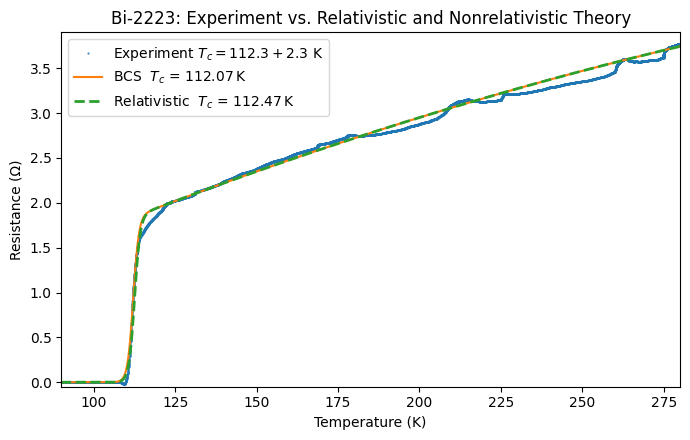

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.loadtxt('superwarm.txt')
T_exp, R_exp = data[:,0], data[:,1]

# load experimental data to be modified

# BCS fit for reference (crude model)
def BCS_model(T, Tc, w, p2, p1, p0):
    quadratic = p2*T**2 + p1*T + p0
    log_drop = 1.0/(1.0 + np.exp((T - Tc)/w))
    return quadratic * (1.0 - log_drop)

# initial guesses:  Tc = 110 K, width = 1 K
norm = T_exp > 150
p2, p1, p0 = np.polyfit(T_exp[norm], R_exp[norm], 2)
initial = [110, 1.0, p2, p1, p0]

popt, _ = curve_fit(BCS_model, T_exp, R_exp, p0=initial, maxfev=10000)
Tc_fit, w_fit, p2_fit, p1_fit, p0_fit = popt

# shift to account for relativistic model from Dirac BdG equation
delta_Tc_rel = 0.4     # upward shift
Tc_rel = Tc_fit + delta_Tc_rel

def BCS_clean(T, Tc):
    quadratic = p2_fit*T**2 + p1_fit*T + p0_fit
    log_drop = 1.0/(1.0 + np.exp((T - Tc)/w_fit))
    return quadratic * (1.0 - log_drop)

# Plotting
T_plot = np.linspace(T_exp.min(), T_exp.max(), 1200)

plt.figure(figsize=(7,4.5))
plt.plot(T_exp, R_exp, '.', ms=1, label='Experiment $T_c = 112.3 + 2.3$ K')
plt.plot(T_plot, BCS_clean(T_plot, Tc_fit), label=f'BCS  $T_c$ = {Tc_fit:.2f} K')
plt.plot(T_plot, BCS_clean(T_plot, Tc_rel), '--', lw=2,
         label=f'Relativistic  $T_c$ = {Tc_rel:.2f} K')

plt.xlim(90, 280)
plt.ylim(-0.05, 3.9)
plt.xlabel('Temperature (K)')
plt.ylabel('Resistance (Ω)')
plt.title('Bi‑2223: Experiment vs. Relativistic and Nonrelativistic Theory')
plt.legend()
plt.tight_layout()
plt.show()

This is by no means the most accurate simulation, but it provides an interesting visual consistent with the literature in that it shows that there isn't a significant difference between the theoretical models, but the relativistic correction is still marginally closer to the experimental results. 